In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import deepcopy as dc
from scipy.interpolate import CubicSpline
from random_transformations import magnitude_warp, time_warp, window_slice, permutation, rotation, scaling

In [72]:
def plot_data(ori, syn=[]):
    # Plotten der Zeitreihe
    plt.figure(figsize=(10, 5))

    if len(syn) != 0:
        plt.plot(np.arange(range), ori[:range], linestyle=':', linewidth=2, color='b', label='Original')
        plt.plot(np.arange(range), syn[:range], linestyle='-', linewidth=2, color='r', label='Synthetisch')
    else:
        plt.plot(np.arange(range), ori[:range], linestyle='-', linewidth=2, color='b', label='Original')

    plt.xticks([])  
    plt.yticks([]) 

    plt.show()

In [73]:
range = 3*24

data_df = pd.read_csv("data/real/mitv_prep_1y.csv")
data_numpy = data_df.to_numpy()[:range]
traffic = data_numpy[:,0].reshape(1, -1, 1)

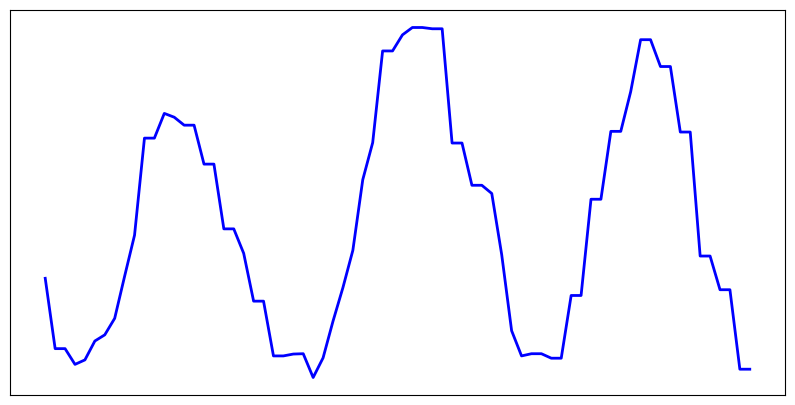

In [74]:
# Original
plot_data(traffic.reshape(-1))

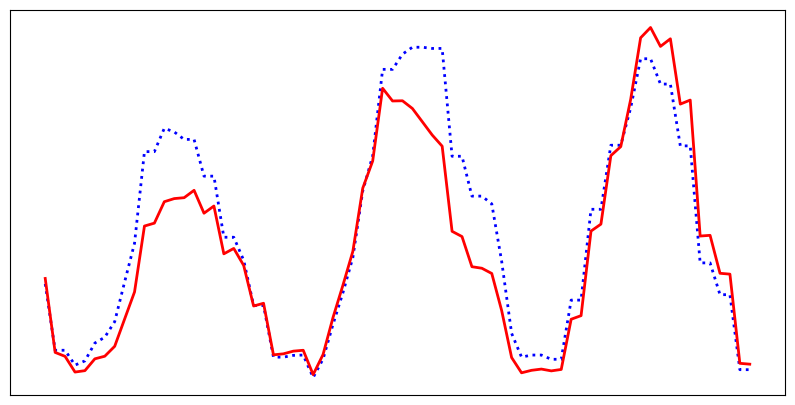

In [75]:
# Magnitude Warping
traffic_magnitude = magnitude_warp(dc(traffic)).reshape(-1)
plot_data(traffic.reshape(-1), traffic_magnitude)

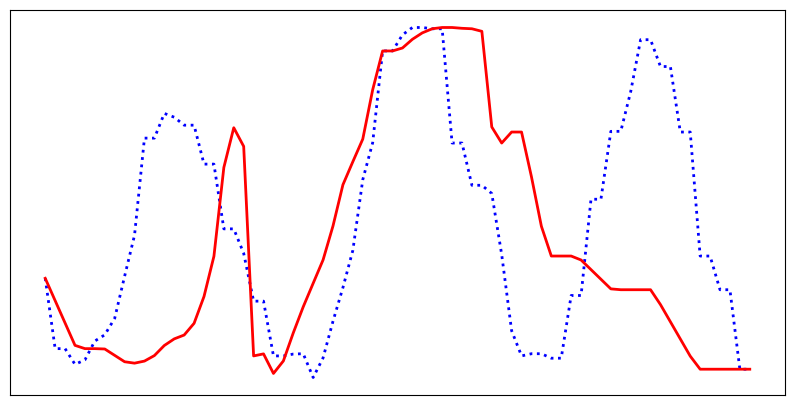

In [82]:
# Time Warping
traffic_time = time_warp(dc(traffic)).reshape(-1)
plot_data(traffic.reshape(-1), traffic_time)

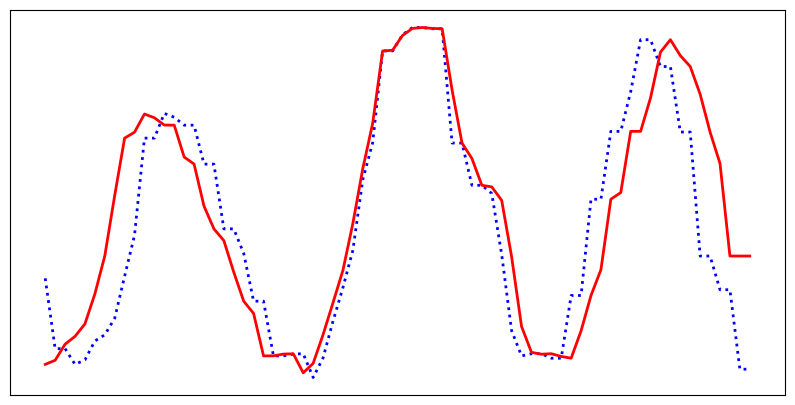

In [77]:
# Window Slicing
traffic_window = window_slice(dc(traffic)).reshape(-1)
plot_data(traffic.reshape(-1), traffic_window)

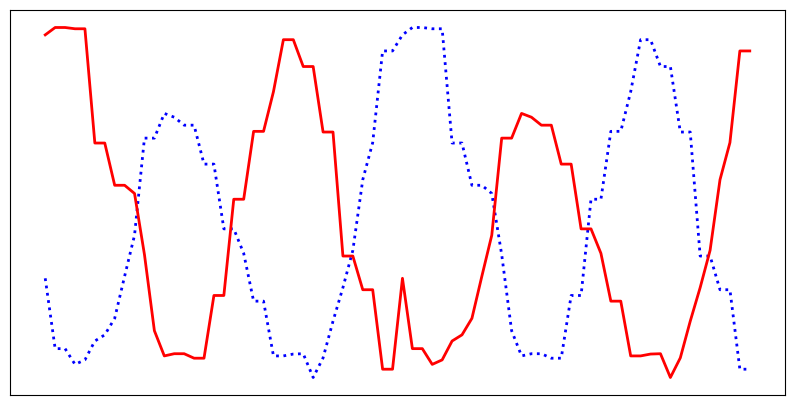

In [81]:
# Perumtatio
traffic_permutation = permutation(dc(traffic), max_segments=4, seg_mode="equal").reshape(-1)
plot_data(traffic.reshape(-1), traffic_permutation)

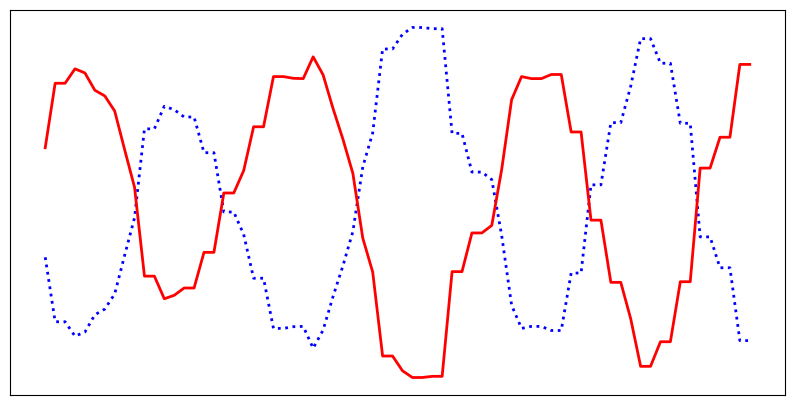

In [83]:
# Rotation
traffic_rotated = rotation(dc(traffic)).reshape(-1)
plot_data(traffic.reshape(-1), traffic_rotated+np.max(traffic))

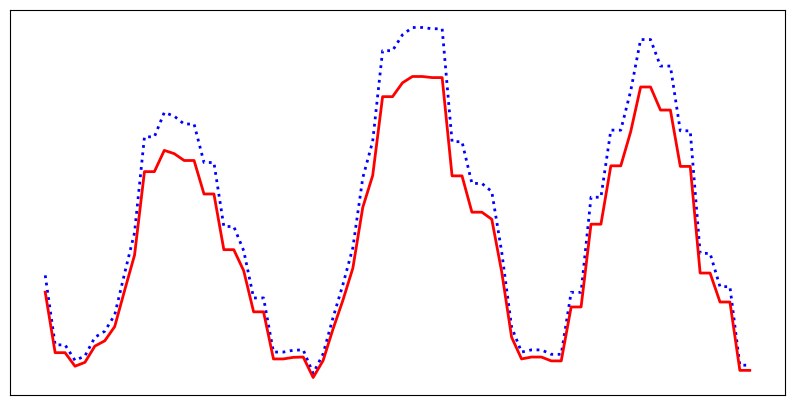

In [98]:
# Scaling
traffic_scaled = scaling(dc(traffic), sigma=0.5).reshape(-1)
plot_data(traffic.reshape(-1), traffic_scaled)
